In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!wget 'https://raw.githubusercontent.com/karpathy/makemore/master/names.txt'

--2023-06-26 14:01:09--  https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt.6’

names.txt.6         100%[===================>] 222.80K  --.-KB/s    in 0.01s   

2023-06-26 14:01:09 (15.4 MB/s) - ‘names.txt.6’ saved [228145/228145]



In [3]:
# read all the lines
words = open('names.txt' , 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
len(words)

32033

In [5]:
# build the vocabulary of the charecters and all their mapping to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [6]:
# build the dataset

block_size = 3
X , Y = [],[]


for word in words[:5]:
    print(word)
    context = [0] * block_size
    # print(context)
    for ch in word+'.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context),'--->',itos[ix])
        context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)   

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [7]:
X.shape , X.dtype , Y.shape , Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [8]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [9]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [10]:
# building the look up table / Embedding Matrix

C = torch.randn((27,2))
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

# but the input of the model is in shape of 
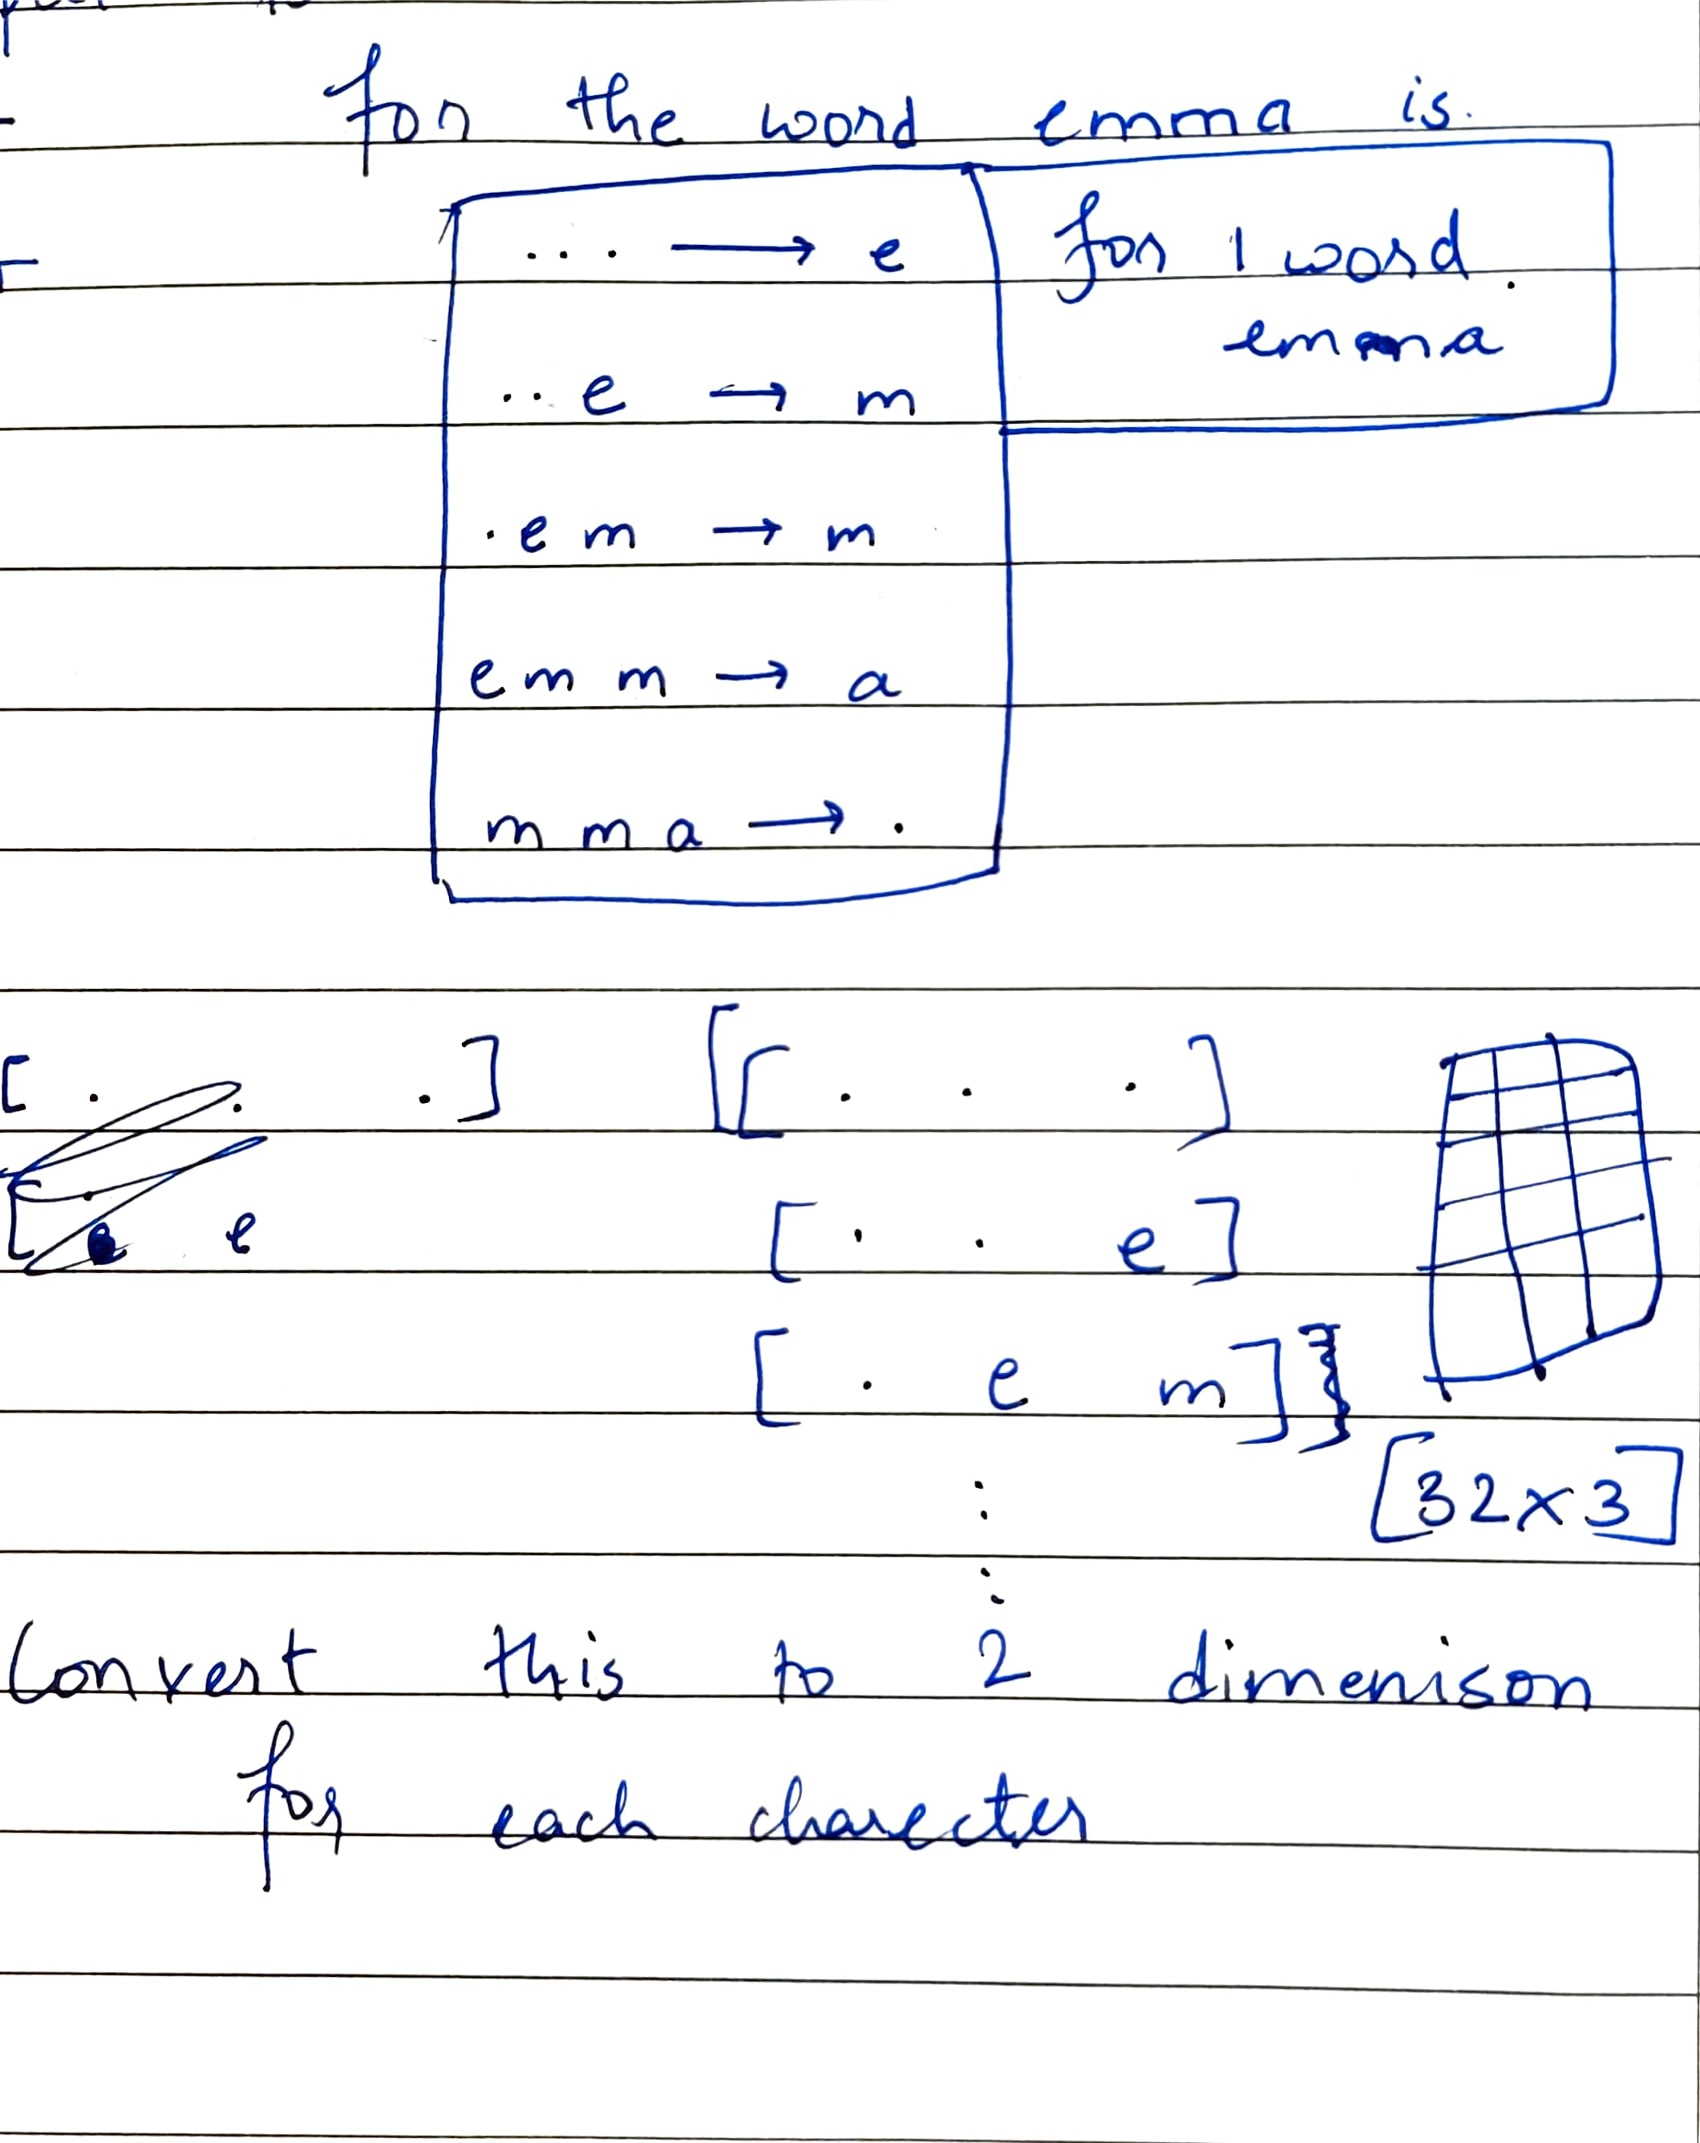
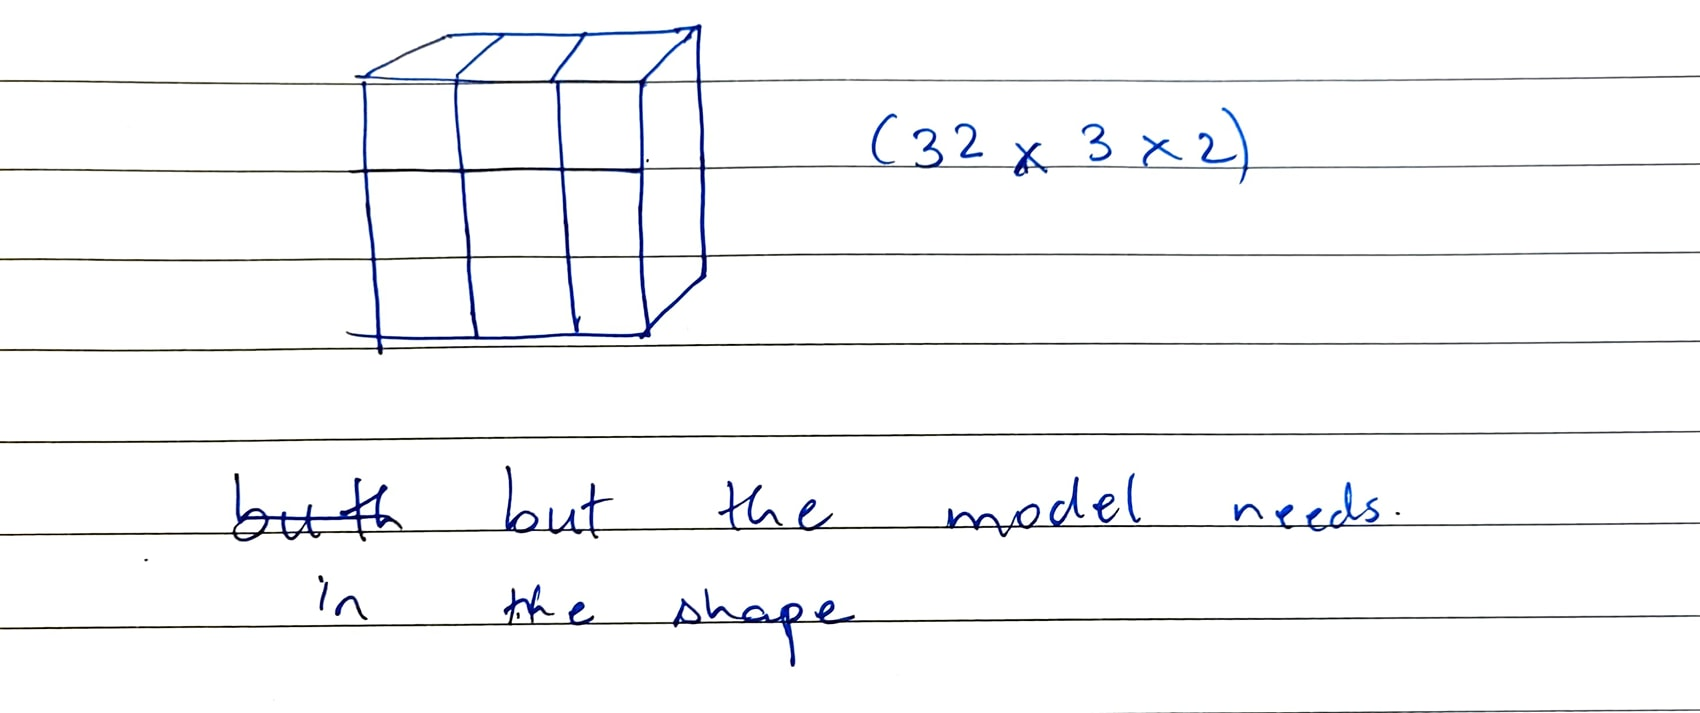
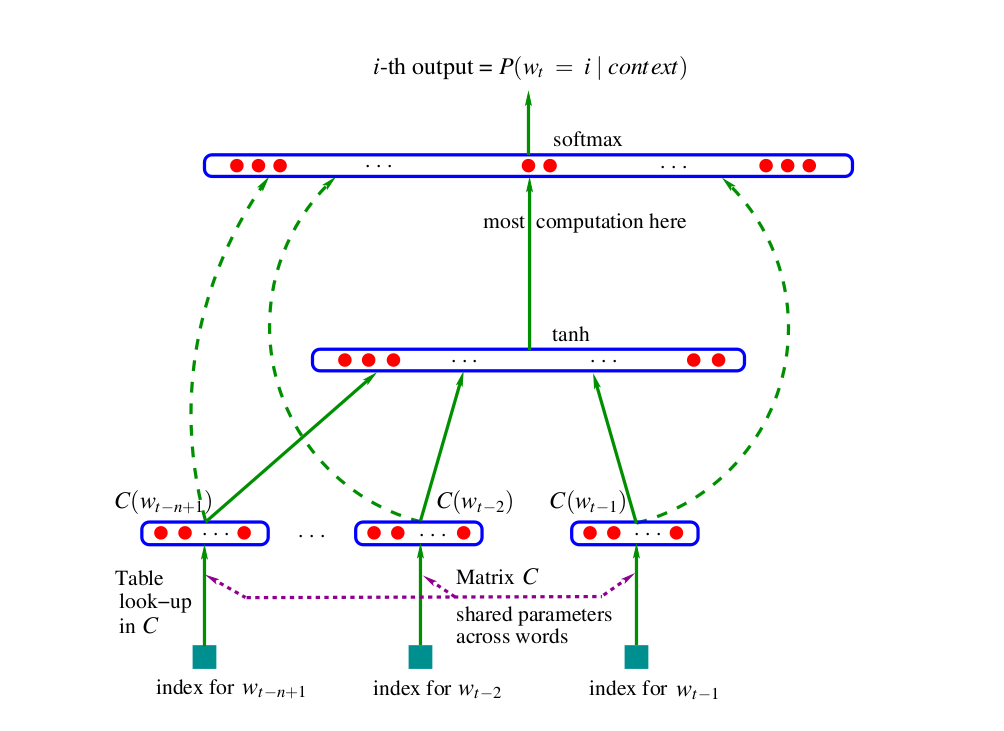

# which is of the shape (32 * 6) where each of the vector of each charecter is concatenated horizontally

In [11]:
# creating weights and baises
W1 = torch.randn((6,100))
b1 = torch.randn(100)

In [12]:
W1.shape , b1.shape

(torch.Size([6, 100]), torch.Size([100]))

In [13]:
h = emb.view((-1,6)) @ W1 + b1          #by adding the -1 in view pytorch will infer what it needs to be for that view to make sense 

In [14]:
h.shape

torch.Size([32, 100])

In [15]:
h = torch.tanh(emb.view((-1,6)) @ W1 + b1)
h

tensor([[ 0.5441,  0.0454,  0.9283,  ...,  0.9943, -0.7442, -0.9778],
        [ 0.4357,  0.0758, -0.4442,  ...,  0.9941,  0.5044, -0.8961],
        [-0.4150,  0.9139, -1.0000,  ...,  0.9971,  0.9106, -0.3631],
        ...,
        [ 0.8651, -0.0253, -0.8535,  ...,  0.9995,  0.8307, -0.9425],
        [-0.3986, -0.5179, -0.9993,  ...,  0.9783,  0.9976, -0.8377],
        [-0.9613,  0.9992, -1.0000,  ...,  0.7855,  0.2639,  0.9665]])

In [16]:
W2 = torch.randn((100,27))
b2 = torch.randn(27)

In [17]:
logits = h @ W2 + b2

In [18]:
logits.shape

torch.Size([32, 27])

In [19]:
counts = logits.exp()
prob = counts / counts.sum(1,keepdim=True)

In [20]:
prob[0].sum()

tensor(1.)

In [21]:
loss = -prob[torch.arange(32),Y].log().mean()
loss

tensor(19.2986)

In [22]:
# -------------now made more respectable--------------------

In [23]:
X.shape , Y.shape

(torch.Size([32, 3]), torch.Size([32]))

In [24]:
g = torch.Generator().manual_seed(2147483647) # for reproducability
C = torch.randn((27,2),generator=g)
W1 = torch.randn((6,100),generator=g)
b1 = torch.randn(100,generator=g)
W2 = torch.randn((100,27),generator=g)
b2 = torch.randn((27),generator=g)

parameters = [C , W1 , b1 , W2 , b2]

In [25]:
sum(p.nelement() for p in parameters) # tensor.nelement gives us the number of elements in that tensor

3481

In [26]:
emb = C[X]
h = torch.tanh(emb.view((-1,6)) @ W1 + b1)
logits = h @ W2 + b2
# counts = logits.exp()
# prob = counts / counts.sum(1,keepdim=True)
# loss = -prob[torch.arange(32),Y].log().mean()
# loss
F.cross_entropy(logits,Y)

tensor(17.7697)

In [27]:
for p in parameters:
    p.requires_grad = True

In [28]:
for _ in range(10):
    # forward pass
    emb = C[X]
    h = torch.tanh(emb.view((-1,6)) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits,Y)
    print(loss.item())
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # update weights
    for p in parameters:
        p.data += -0.1 * p.grad

17.76971435546875
13.656401634216309
11.298768997192383
9.452455520629883
7.984262466430664
6.891321182250977
6.100014686584473
5.452036380767822
4.898151874542236
4.414664268493652


In [29]:
for _ in range(1000):
    # forward pass
    emb = C[X]
    h = torch.tanh(emb.view((-1,6)) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits,Y)
    # print(loss.item())
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # update weights
    for p in parameters:
        p.data += -0.1 * p.grad
        
print(loss.item())

0.25609633326530457


In [30]:
# Now lets build for the entire dataset

In [31]:
# build the dataset

block_size = 3
X , Y = [],[]


for word in words:
    # print(word)
    context = [0] * block_size
    # print(context)
    for ch in word+'.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context),'--->',itos[ix])
        context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)   

In [32]:
X.shape ,Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [33]:
g = torch.Generator().manual_seed(2147483647) # for reproducability
C = torch.randn((27,2),generator=g)
W1 = torch.randn((6,100),generator=g)
b1 = torch.randn(100,generator=g)
W2 = torch.randn((100,27),generator=g)
b2 = torch.randn((27),generator=g)

parameters = [C , W1 , b1 , W2 , b2]

In [34]:
for p in parameters:
    p.requires_grad = True

In [35]:
for _ in range(10):
    # forward pass
    emb = C[X]
    h = torch.tanh(emb.view((-1,6)) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits,Y)
    print(loss.item())
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # update weights
    for p in parameters:
        p.data += -0.1 * p.grad

19.505229949951172
17.08448600769043
15.776532173156738
14.833342552185059
14.002605438232422
13.253263473510742
12.57991886138916
11.983102798461914
11.470492362976074
11.05185604095459


In [36]:
# lets mini-batch it

In [37]:
for _ in range(100):
    # minibatch
    ix = torch.randint(0,X.shape[0],(32,))
    
    # forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view((-1,6)) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits,Y[ix])
    # print(loss.item())
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # update weights
    for p in parameters:
        p.data += -0.1 * p.grad
        
print(loss.item())

4.733896255493164


In [38]:
# calculating the loss on the entire dataset
emb = C[X]
h = torch.tanh(emb.view((-1,6)) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Y)
loss

tensor(3.6286, grad_fn=<NllLossBackward0>)

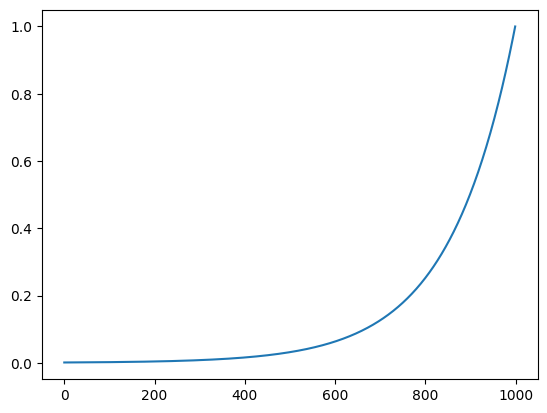

In [39]:
lre = torch.linspace(-3,0,1000)
lrs = 10**lre
lrs
plt.plot([i.item() for i in lrs])

In [40]:
lre = torch.linspace(-3,0,1000)
lrs = 10**lre


lri = []
lossi = []


g = torch.Generator().manual_seed(2147483647) # for reproducability
C = torch.randn((27,2),generator=g)
W1 = torch.randn((6,100),generator=g)
b1 = torch.randn(100,generator=g)
W2 = torch.randn((100,27),generator=g)
b2 = torch.randn((27),generator=g)

parameters = [C , W1 , b1 , W2 , b2]


for p in parameters:
    p.requires_grad = True
    
for i in range(1000):
    # minibatch
    ix = torch.randint(0,X.shape[0],(32,))
    
    # forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view((-1,6)) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits,Y[ix])
    # print(loss.item())
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # update weights
    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad
        
    # track stats
    lri.append(lr)
    lossi.append(loss.item())

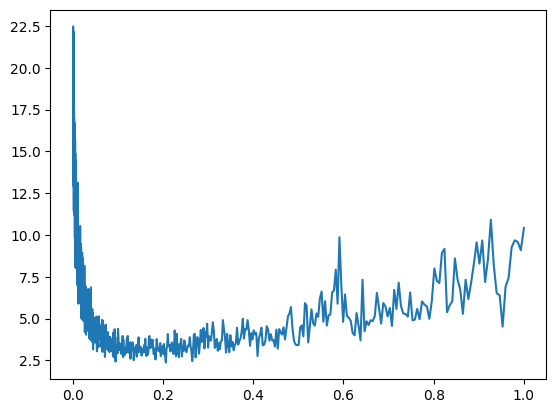

In [41]:
plt.plot(lri , lossi)   

In [42]:
# lre = torch.linspace(-3,0,1000)
# lrs = 10**lre


# lri = []
# lossi = []


g = torch.Generator().manual_seed(2147483647) # for reproducability
C = torch.randn((27,2),generator=g)
W1 = torch.randn((6,100),generator=g)
b1 = torch.randn(100,generator=g)
W2 = torch.randn((100,27),generator=g)
b2 = torch.randn((27),generator=g)

parameters = [C , W1 , b1 , W2 , b2]


for p in parameters:
    p.requires_grad = True

In [43]:
for i in range(10000):
    # minibatch
    ix = torch.randint(0,X.shape[0],(32,))
    
    # forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view((-1,6)) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits,Y[ix])
    # print(loss.item())
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # update weights
    # lr = lrs[i]
    lr = .001
    for p in parameters:
        p.data += -lr * p.grad
        
    # # track stats
    # lri.append(lr)
    # lossi.append(loss.item()) 

In [44]:
# calculating the loss on the entire dataset
emb = C[X]
h = torch.tanh(emb.view((-1,6)) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Y)
loss

tensor(3.5649, grad_fn=<NllLossBackward0>)

In [45]:
# train split , dev/validation split , test split
# build the splits
def build_dataset(words,block_size=3):
    X , Y = [],[]


    for word in words:
        # print(word)
        context = [0] * block_size
        # print(context)
        for ch in word+'.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            # print(''.join(itos[i] for i in context),'--->',itos[ix])
            context = context[1:] + [ix] # crop and append

    X = torch.tensor(X)
    Y = torch.tensor(Y)   
    print(X.shape, Y.shape)
    return X,Y



import random
random.seed(42)

# # read all the lines
# words = open('names.txt' , 'r').read().splitlines()
random.shuffle(words)


n1 = int(.8*len(words))
n2 = int(.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev , Ydev = build_dataset(words[n1:n2])
Xte , Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [46]:
g = torch.Generator().manual_seed(2147483647) # for reproducability
C = torch.randn((27,2),generator=g)
W1 = torch.randn((6,100),generator=g)
b1 = torch.randn(100,generator=g)
W2 = torch.randn((100,27),generator=g)
b2 = torch.randn((27),generator=g)

parameters = [C , W1 , b1 , W2 , b2]


for p in parameters:
    p.requires_grad = True

In [47]:
# lre = torch.linspace(-3,0,10000)
# lrs = 10**lre


# lri = []
# lossi = []

for i in range(10000):
    # minibatch
    ix = torch.randint(0,Xtr.shape[0],(32,))
    
    # forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view((-1,6)) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits,Ytr[ix])
    # print(loss.item())
    
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # update weights
    # lr = lre[i]
    lr = .001
    for p in parameters:
        p.data += -lr * p.grad
        
    # # track stats
    # lri.append(lr)
    # lossi.append(loss.item()) 

In [48]:
loss.item()

3.4149699211120605

In [49]:
# calculating the loss on the entire dataset
emb = C[Xdev]
h = torch.tanh(emb.view((-1,6)) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Ydev)
loss

tensor(3.5621, grad_fn=<NllLossBackward0>)

In [50]:
# calculating the loss on the entire dataset
emb = C[Xte]
h = torch.tanh(emb.view((-1,6)) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Yte)
loss

tensor(3.5508, grad_fn=<NllLossBackward0>)

In [51]:
# so as we are underfitting lets try to increase the size of the model

In [52]:
g = torch.Generator().manual_seed(2147483647) # for reproducability
C = torch.randn((27,2),generator=g)
W1 = torch.randn((6,300),generator=g)
b1 = torch.randn(300,generator=g)
W2 = torch.randn((300,27),generator=g)
b2 = torch.randn((27),generator=g)

parameters = [C , W1 , b1 , W2 , b2]


for p in parameters:
    p.requires_grad = True
    
sum(p.nelement() for p in parameters)

10281

In [53]:
# lre = torch.linspace(-3,0,10000)
# lrs = 10**lre


lri = []
lossi = []
stepi = []

for i in range(30000):
    # minibatch
    ix = torch.randint(0,Xtr.shape[0],(32,))
    
    # forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view((-1,6)) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits,Ytr[ix])
    # print(loss.item())
    
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # update weights
    # lr = lre[i]
    lr = .001
    for p in parameters:
        p.data += -lr * p.grad
        
    # # track stats
    # lri.append(lr)
    stepi.append(i)
    lossi.append(loss.item()) 
    
loss.item()

2.752429723739624

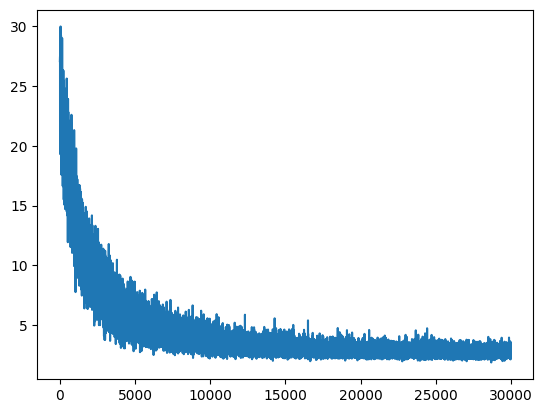

In [54]:
plt.plot(stepi,lossi)

In [55]:
# calculating the loss on the entire dataset
emb = C[Xdev]
h = torch.tanh(emb.view((-1,6)) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Ydev)
loss

tensor(2.6723, grad_fn=<NllLossBackward0>)

In [56]:
# calculating the loss on the entire dataset
emb = C[Xte]
h = torch.tanh(emb.view((-1,6)) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Yte)
loss

tensor(2.6986, grad_fn=<NllLossBackward0>)

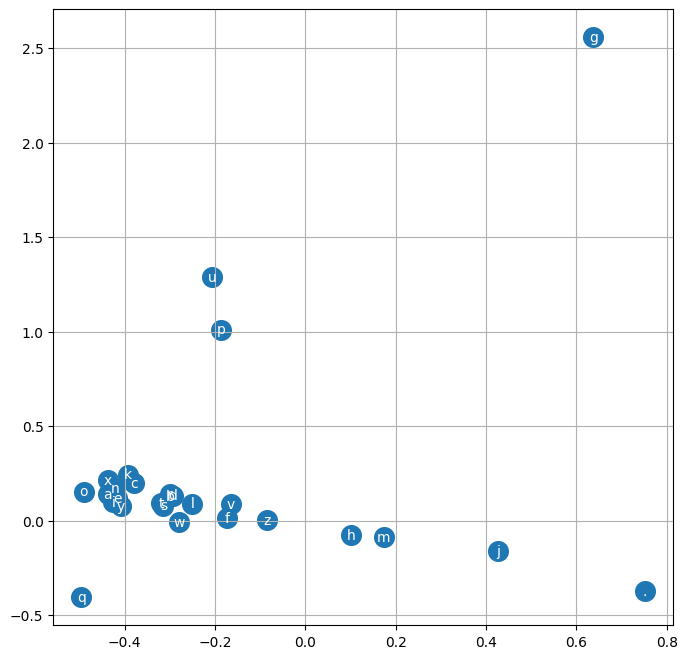

In [57]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data , C[:,1].data , s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item() , C[i,1].item() , itos[i] , ha = 'center',va = 'center',color = 'white')
plt.grid('minor')

In [82]:
# the bottle neck might be the no. of embedding size
# so let's change it to 10 instead of 2



g = torch.Generator().manual_seed(2147483647) # for reproducability
C = torch.randn((27,10),generator=g)
W1 = torch.randn((30,200),generator=g)
b1 = torch.randn(200,generator=g)
W2 = torch.randn((200,27),generator=g)
b2 = torch.randn((27),generator=g)

parameters = [C , W1 , b1 , W2 , b2]


for p in parameters:
    p.requires_grad = True
    
sum(p.nelement() for p in parameters)

11897

In [83]:
# lre = torch.linspace(-3,0,10000)
# lrs = 10**lre


lri = []
lossi = []
stepi = []


In [84]:
for i in range(200000):
    # minibatch
    ix = torch.randint(0,Xtr.shape[0],(32,))
    
    # forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view((-1,30)) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits,Ytr[ix])
    # print(loss.item())
    
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # update weights
    # lr = lre[i]
    lr = .1 if i<100000 else .01
    for p in parameters:
        p.data += -lr * p.grad
        
    # # track stats
    # lri.append(lr)
    stepi.append(i)
    lossi.append(loss.log10().item()) 
    
loss.item()

2.160104513168335

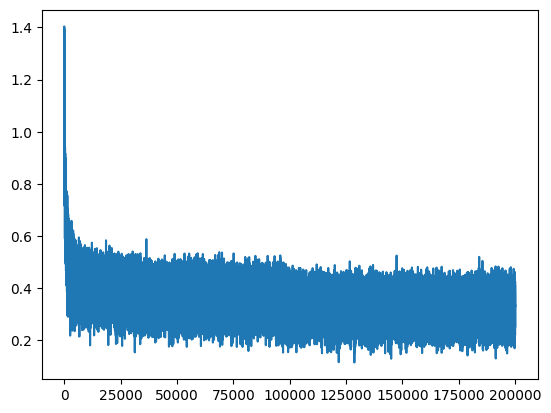

In [85]:
plt.plot(stepi,lossi)

In [86]:
# calculating the loss on the entire dataset
emb = C[Xdev]
h = torch.tanh(emb.view((-1,30)) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Ydev)
loss

tensor(2.1700, grad_fn=<NllLossBackward0>)

In [87]:
# calculating the loss on the entire dataset
emb = C[Xte]
h = torch.tanh(emb.view((-1,30)) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits,Yte)
loss

tensor(2.1664, grad_fn=<NllLossBackward0>)

In [95]:
# sampling from the model

g = torch.Generator().manual_seed(2147483647 + 10 )

for _ in range(20):
    out  = []
    context = [0]*block_size
    while True:
        emb = C[torch.tensor([context])] # (1,block_size,d)
        h = torch.tanh(emb.view(1,-1) @ W1 + b1)
        logits = h@W2 + b2
        probs = F.softmax(logits,dim=1)
        ix = torch.multinomial(probs , num_samples=1,generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix==0:
            break
    print(''.join( itos[i] for i in out))

mora.
mayanniee.
melyn.
alee.
thruthadraeg.
adered.
elin.
shi.
jen.
eden.
van.
aarvelyn.
malkia.
nosadhvis.
hiriel.
kindreelle.
xetton.
kum.
kynd.
ryyah.
